In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
customer = pd.read_csv("shopping_behavior_updated.csv")

In [3]:
customer.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


#### Features we need are - age, purchase amount, frequency of purchases, previous purchases, review rating, gender, category, subscription status, shipping type, Discount applied, promo code used.

In [4]:
customer = customer.drop(['Customer ID', 'Item Purchased', 'Location', 'Size', 'Color', 'Season', 'Payment Method'], axis=1)

In [5]:
customer.columns

Index(['Age', 'Gender', 'Category', 'Purchase Amount (USD)', 'Review Rating',
       'Subscription Status', 'Shipping Type', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Frequency of Purchases'],
      dtype='object')

## Encoding

#### Columns that require encoding are gender, category, subscription status, shipping type, discount applied, promo code used

In [6]:
varlist = ['Subscription Status','Discount Applied','Promo Code Used']
customer[varlist] = customer[varlist].apply(lambda x:x.map({'Yes':1,'No':0}))

In [7]:
customer.head()

,Age,Gender,Category,Purchase Amount (USD),Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases
0,55,Male,Clothing,53,3.1,1,Express,1,1,14,Fortnightly
1,19,Male,Clothing,64,3.1,1,Express,1,1,2,Fortnightly
2,50,Male,Clothing,73,3.1,1,Free Shipping,1,1,23,Weekly
3,21,Male,Footwear,90,3.5,1,Next Day Air,1,1,49,Weekly
4,45,Male,Clothing,49,2.7,1,Free Shipping,1,1,31,Annually


### Label encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
category_list = ['Gender', 'Category', 'Shipping Type','Frequency of Purchases']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in category_list:
    customer[column] = label_encoder.fit_transform(customer[column])

# Check the results
print(customer.head())


   Age  Gender  Category  Purchase Amount (USD)  Review Rating  \
0   55       1         1                     53            3.1   
1   19       1         1                     64            3.1   
2   50       1         1                     73            3.1   
3   21       1         2                     90            3.5   
4   45       1         1                     49            2.7   

   Subscription Status  Shipping Type  Discount Applied  Promo Code Used  \
0                    1              1                 1                1   
1                    1              1                 1                1   
2                    1              2                 1                1   
3                    1              3                 1                1   
4                    1              2                 1                1   

   Previous Purchases  Frequency of Purchases  
0                  14                       3  
1                   2                       3  
2 

In [9]:
customer.head()

,Age,Gender,Category,Purchase Amount (USD),Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases
0,55,1,1,53,3.1,1,1,1,1,14,3
1,19,1,1,64,3.1,1,1,1,1,2,3
2,50,1,1,73,3.1,1,2,1,1,23,6
3,21,1,2,90,3.5,1,3,1,1,49,6
4,45,1,1,49,2.7,1,2,1,1,31,0


## Scaling the data

### Min max scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['Age','Purchase Amount (USD)','Review Rating','Previous Purchases']

customer[num_vars] = scaler.fit_transform(customer[num_vars])

In [11]:
customer.head()

,Age,Gender,Category,Purchase Amount (USD),Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases
0,0.711538,1,1,0.4125,0.24,1,1,1,1,0.265306,3
1,0.019231,1,1,0.5500,0.24,1,1,1,1,0.020408,3
2,0.615385,1,1,0.6625,0.24,1,2,1,1,0.448980,6
3,0.057692,1,2,0.8750,0.40,1,3,1,1,0.979592,6
4,0.519231,1,1,0.3625,0.08,1,2,1,1,0.612245,0


## Hopkins Statistics

In [12]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [13]:
hopkins(customer)

0.6947008572590637

As the value of hopkins is > 0.75 there is a string tendency to form a cluster

## Modeling 

In [14]:
from sklearn.cluster import KMeans

### Finding optimal clusters using elbow curve

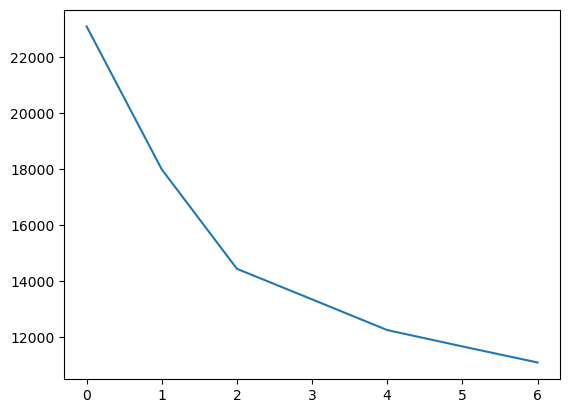

In [15]:
#elbow-curve/SSD - sum of square distances

ssd = []
range_n_clusters = [2,3,4,5,6,7,8]   #range of clusters
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)
    kmeans.fit(customer)
    
    ssd.append(kmeans.inertia_)   #inertia_ -- Sum of squared distances of samples to their closet cluster center

    
#plot the SSDs for each n_clusters
plt.plot(ssd)

In [16]:
ssd

[23099.23789716251,
 17989.61580581506,
 14437.647244544898,
 13344.54301022028,
 12248.083236513492,
 11663.352872620453,
 11090.010689661089]

### Building model

In [17]:
kmeans = KMeans(n_clusters=3, max_iter = 50)
kmeans.fit(customer)

kmeans.labels_

array([0, 0, 2, ..., 2, 2, 2], dtype=int32)

Optimal clusters will be 3 according this elbow curve

In [18]:
# assiging labels 
customer['cluster_id'] = kmeans.labels_
customer.head()

,Age,Gender,Category,Purchase Amount (USD),Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,cluster_id
0,0.711538,1,1,0.4125,0.24,1,1,1,1,0.265306,3,0
1,0.019231,1,1,0.5500,0.24,1,1,1,1,0.020408,3,0
2,0.615385,1,1,0.6625,0.24,1,2,1,1,0.448980,6,2
3,0.057692,1,2,0.8750,0.40,1,3,1,1,0.979592,6,2
4,0.519231,1,1,0.3625,0.08,1,2,1,1,0.612245,0,0


### Plotting the clusters in 2D

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(customer)  # Assuming 'customer' is your dataset after clustering


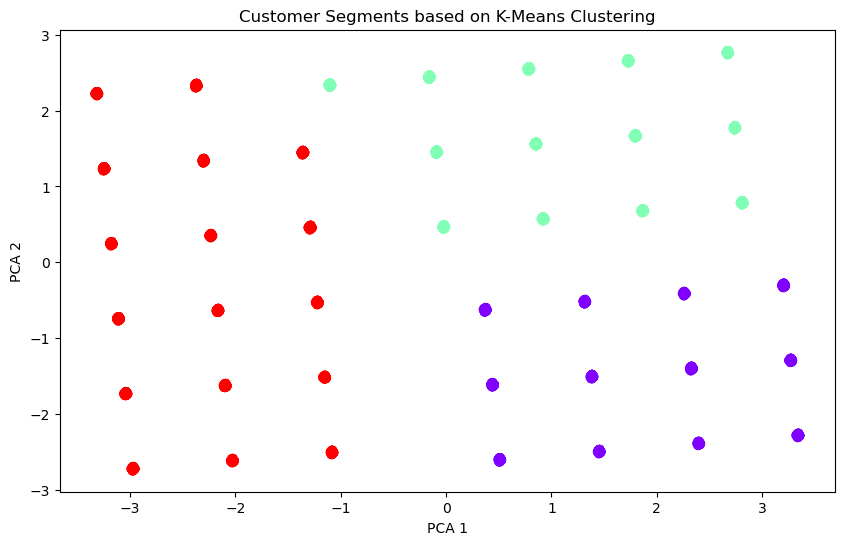

In [21]:
# Assuming 'kmeans.labels_' contains your cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segments based on K-Means Clustering')
plt.show()


### Plotting clusters in 3D

In [22]:
from mpl_toolkits.mplot3d import Axes3D


In [23]:
pca_3d = PCA(n_components=3)
pca_3d_components = pca_3d.fit_transform(customer)


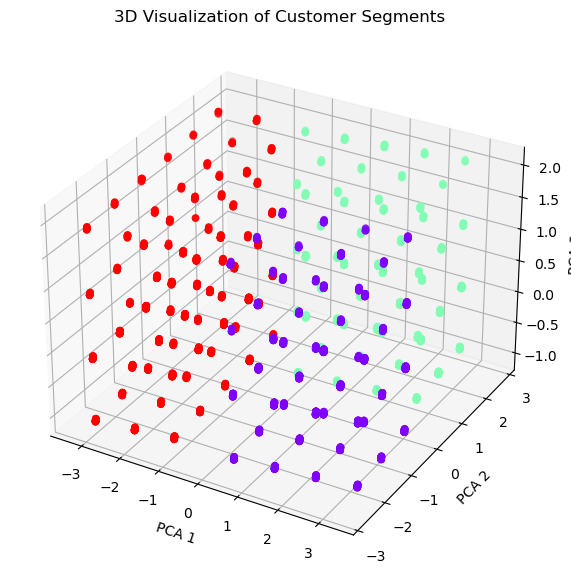

In [24]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d_components[:, 0], pca_3d_components[:, 1], pca_3d_components[:, 2], 
           c=kmeans.labels_, cmap='rainbow')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.title('3D Visualization of Customer Segments')
plt.show()


### Pairplot of the clusters

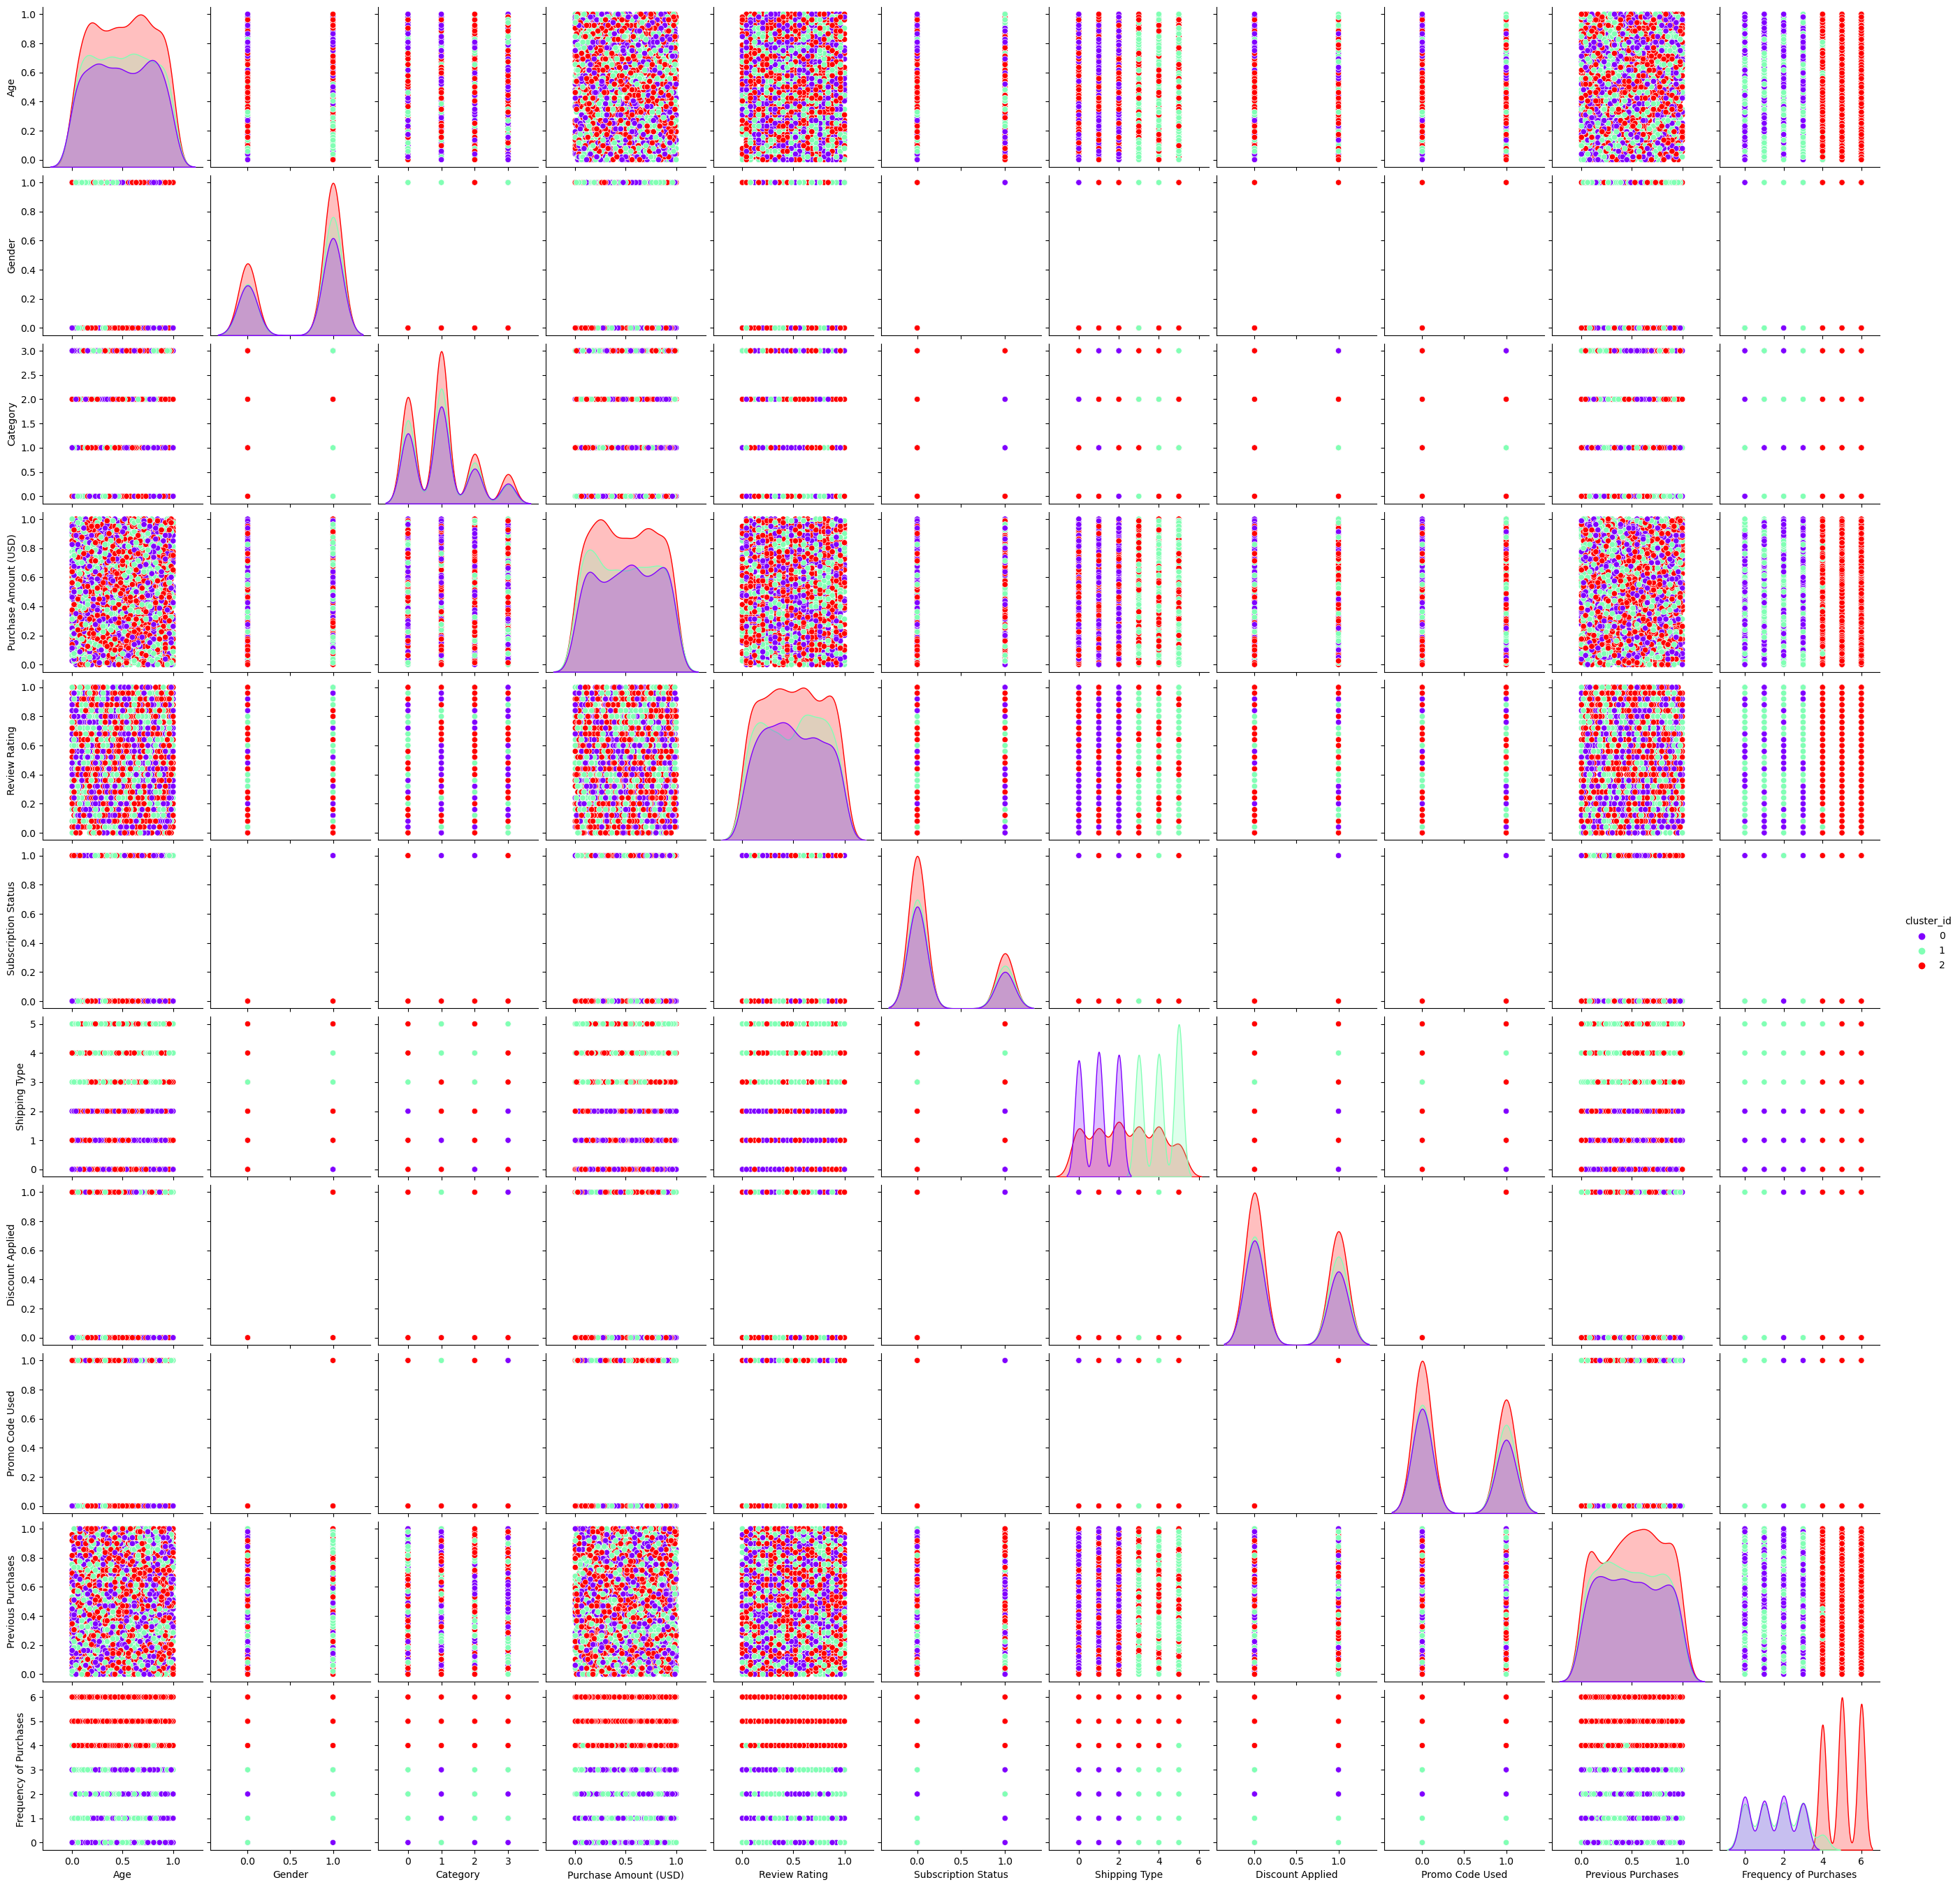

In [25]:
import seaborn as sns



# Plot using seaborn pairplot
sns.pairplot(customer, hue='cluster_id', palette='rainbow')
plt.show()


### Analysing each cluster

In [26]:
cluster_summary = customer.groupby('cluster_id').agg({
    'Purchase Amount (USD)': ['mean', 'median', 'count'],
    'Frequency of Purchases': ['mean'],
    'Review Rating': ['mean'],
    'Discount Applied': ['mean'],
    # Include other relevant features
}).reset_index()


In [29]:
print(cluster_summary)

  cluster_id Purchase Amount (USD)               Frequency of Purchases  \
                              mean  median count                   mean   
0          0              0.510503  0.5250  1114               1.464093   
1          1              0.487776  0.4875  1222               1.697218   
2          2              0.494725  0.4875  1564               5.049233   

  Review Rating Discount Applied  
           mean             mean  
0      0.496266         0.412926  
1      0.499083         0.449264  
2      0.503325         0.427110  


### Conclusions

Cluster 0

Purchase Amount(USD):
- This group has the highest average purchase amount(compared to the other clusters), though the difference is minimal.

Frequenct of purchases:
- Customers in this segment make the fewest purchase on average, indicating they might be less engaged or more occasional buyers

Review rating:
- The average review rating is slightly lower than the other clusters, which could indicate slightly lower customer satisfaction

Discount Applied:
- This group benefits from a lower proportion of discounts compared to the other clusters, possibly indicating they are less price-sensitive.

Cluster 1

Purchase Amount(USD):
- Customers in this group spend less per purchase on average compared to Cluster 0

Frequency of purchases:
- These customers purchase more frequently than cluster 0, suggeting moderate engagement.

Review rating:
- Their average rating is slightly higher than cluster 0, indicating somewhat higher satisfaction

Cluster 2

Purchase Amount(USD):
- The average purchase amount is comparable to cluster 1, though slightly higher

Frequency of purchases:
- This is the most engaged customer segement by far, with a significantly higher frequency of purchases, suggesting these are repeat customers or brand loyalists.

Review Rating:
- Customers in this segement have the highest average review rating, suggesting higher satisfaction with their purchases.

Discount applied:
- Discounts are applied frequently in this cluster, but not as much as in cluster 1. This suggests that these customers may be more willing to pay full price while still using discounts on occasion.

Cluster 0 - represents occasional buyers who tend to make fewer purchases and are less influenced by discounts. They also give slightly lower review ratings, indicating they may need more attention to improve their engagement and satisfaction

Cluster 1 - represents moderately frequent buyers who are price-sensitive and more likely to use discounts. Their satisfaction levels are average, but their purchase frequency is higher than cluster 0.

Cluster 2 - represents highly engaged, loyal customers who make frequent purchases and provide the best review ratings. They are also somewhat price-sensitive, using discounts regulary but not overwhelmingly so.

### Recommendations

For cluster 0 - Want to focus on increasing engagement through personalized marketing and incentives to drive more purchases

For Cluster 1 - Offering more targeted discount offers and loyalty rewards could help maintain their engagement and increase satisfaction

For Cluster 2 - These customers are higlhy loyal, so maintaining their satisfaction through premium services or exclusive offers (not necessarily discounts) could strengthemn their loyalty further.